In [ ]:
#библиотеки
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#линейная регрессия
from sklearn.linear_model import LinearRegression

#метрики регрессии
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#разбиение на train и test
from sklearn.model_selection import train_test_split

#нормализация, стандартизация
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#дерево
from sklearn.tree import DecisionTreeRegressor


#массивы
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
sample = pd.read_csv("sample_submition.csv")

<Axes: >

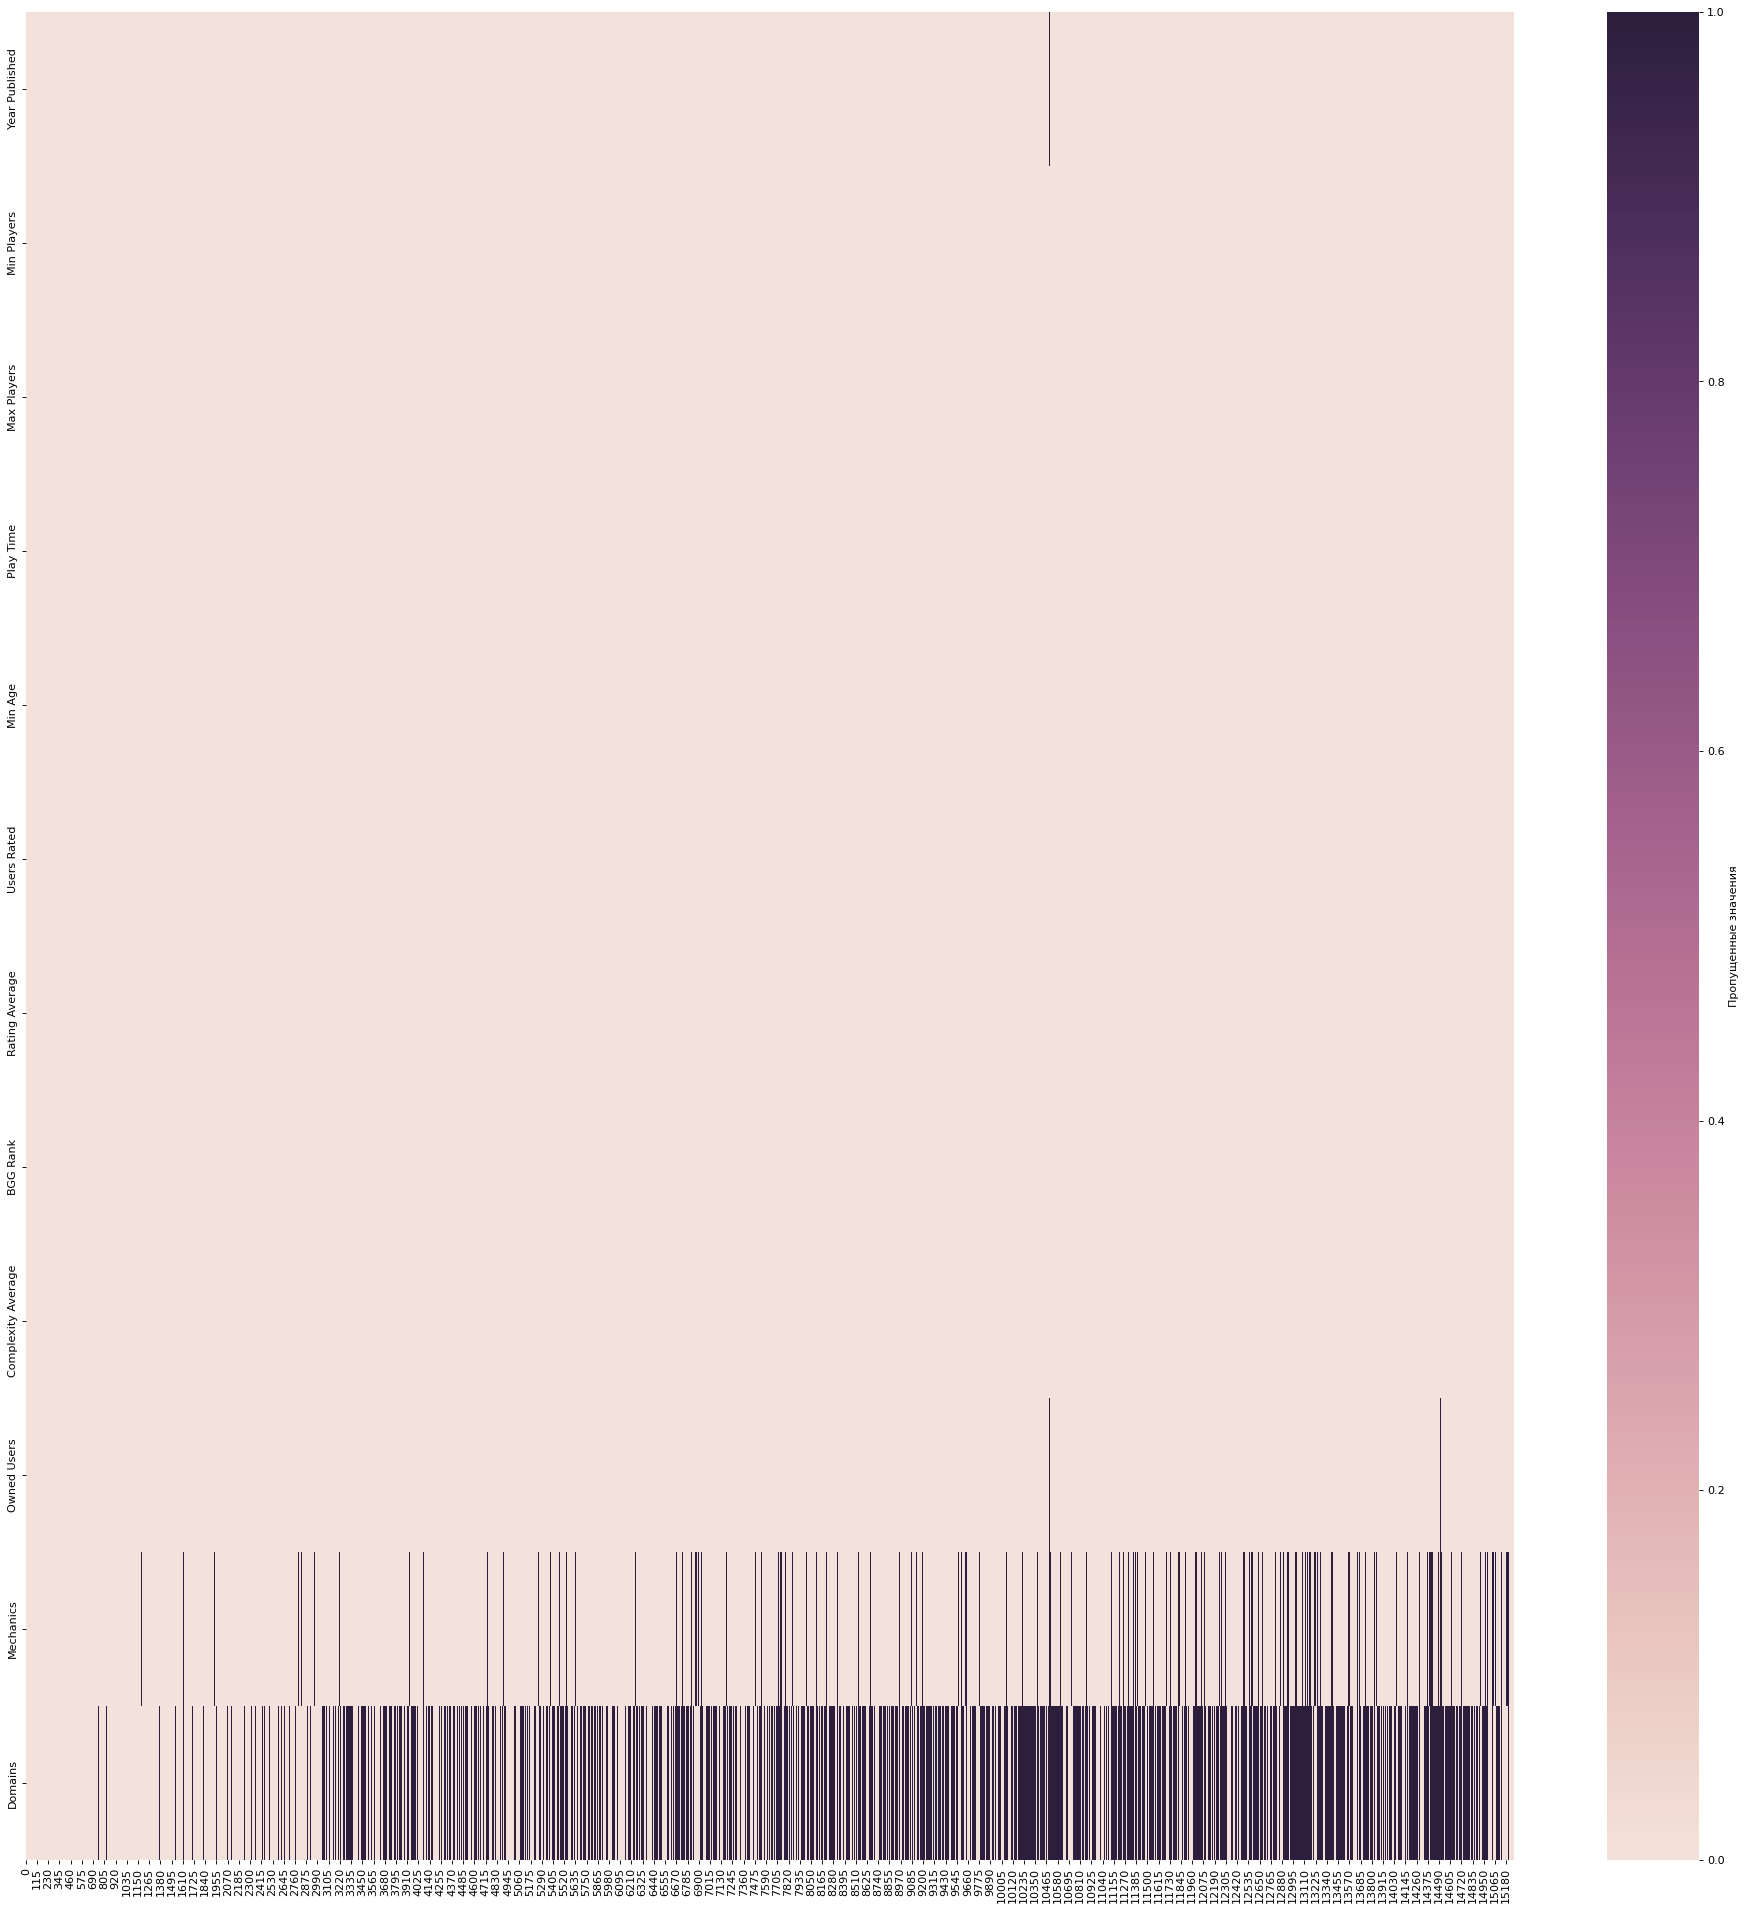

In [ ]:
train.drop(['ID', 'Name'], axis= 1 , inplace = True)

plt.figure(figsize=(30,30), dpi= 80)
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(train.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Пропущенные значения'})

In [ ]:
train.isnull().sum()

Year Published           1
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
Rating Average           0
BGG Rank                 0
Complexity Average       0
Owned Users             17
Mechanics             1200
Domains               7649
dtype: int64

In [ ]:
train["Year Published"] = np.where(train["Year Published"].isna(), 2024, train["Year Published"])
train["Year Published"] = np.where(train["Year Published"], 2024 - train["Year Published"], train["Year Published"])

train["Owned Users"] = np.where(train["Owned Users"].isna(), 0, train["Owned Users"])

train['Rating Average'] = train['Rating Average'].apply(lambda x: float(x.replace(',', '.')))
train['Complexity Average'] = train['Complexity Average'].apply(lambda x: float(x.replace(',', '.')))

train.isnull().sum()

Year Published           0
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
Rating Average           0
BGG Rank                 0
Complexity Average       0
Owned Users              0
Mechanics             1200
Domains               7649
dtype: int64

<Axes: >

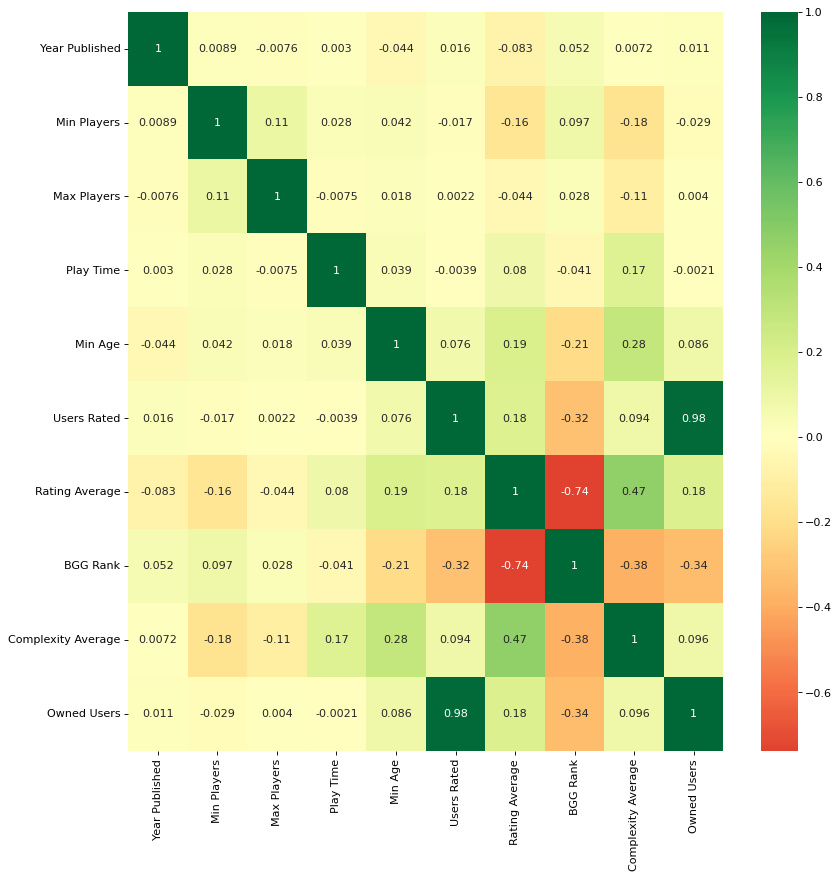

In [ ]:
plt.figure(figsize=(12, 12), dpi= 80)
sns.heatmap(train.drop(columns=['Domains', 'Mechanics']).corr(), xticklabels=train.drop(columns=['Domains', 'Mechanics']).corr().columns, yticklabels=train.drop(columns=['Domains', 'Mechanics']).corr().columns, cmap='RdYlGn', center=0, annot=True)

In [ ]:
train_mech = train['Mechanics'].str.get_dummies(sep=', ')
train = pd.concat([train.drop(columns=['Mechanics']), train_mech], axis=1)
train_domains = train["Domains"].str.get_dummies(sep=', ')
train = pd.concat([train.drop(columns=['Domains']), train_domains], axis=1)
train.isnull().sum().sum()

0

In [ ]:
train_x = train.drop(columns=['Rating Average'], axis=1).select_dtypes(include="number")
train_y = train['Rating Average']

train_x_train, train_x_test, train_y_train, train_y_test = train_test_split(train_x, train_y, test_size=0.3)

#без масштабирования
model = LinearRegression()
model.fit(train_x_train, train_y_train)

pred = model.predict(train_x_test)

model_tree = DecisionTreeRegressor(max_depth=4, random_state=1)
model_tree.fit(train_x_train, train_y_train)

pred_tree = model_tree.predict(train_x_test)


#стандартизация
std = StandardScaler()
train_x_train_std = std.fit_transform(train_x_train)
train_x_test_std = std.fit_transform(train_x_test)

model_std = LinearRegression()
model_std.fit(train_x_train_std, train_y_train)

pred_std = model_std.predict(train_x_test_std)

model_std_tree = DecisionTreeRegressor(max_depth=4, random_state=1)
model_std_tree.fit(train_x_train_std, train_y_train)

pred_std_tree = model_std_tree.predict(train_x_test_std)


#нормализация
norm = MinMaxScaler()
train_x_train_norm = norm.fit_transform(train_x_train)
train_x_test_norm = norm.fit_transform(train_x_test)

model_norm = LinearRegression()
model_norm.fit(train_x_train_norm, train_y_train)

pred_norm = model_norm.predict(train_x_test_norm)

model_norm_tree = DecisionTreeRegressor(max_depth=4, random_state=1)
model_norm_tree.fit(train_x_train_norm, train_y_train)

pred_norm_tree = model_norm_tree.predict(train_x_test_norm)



#метрики
print("Линейная регрессия, без масштабирования")
print('Mean Absolute Error:', mean_absolute_error(train_y_test, pred))
print('Mean Squared Error:', mean_squared_error(train_y_test, pred))
print('R2 score:', r2_score(train_y_test, pred))
print("")
print("Линейная регрессия, со стандартизацией")
print('Mean Absolute Error:', mean_absolute_error(train_y_test, pred_std))
print('Mean Squared Error:', mean_squared_error(train_y_test, pred_std))
print('R2 score:', r2_score(train_y_test, pred_std))
print("")
print("Линейная регрессия, с нормализацией")
print('Mean Absolute Error:', mean_absolute_error(train_y_test, pred_norm))
print('Mean Squared Error:', mean_squared_error(train_y_test, pred_norm))
print('R2 score:', r2_score(train_y_test, pred_norm))
print("")
print("Дерево решений, без масштабирования")
print('Mean Absolute Error:', mean_absolute_error(train_y_test, pred_tree))
print('Mean Squared Error:', mean_squared_error(train_y_test, pred_tree))
print('R2 score:', r2_score(train_y_test, pred_tree))
print("")
print("Дерево решений, со стандартизацией")
print('Mean Absolute Error:', mean_absolute_error(train_y_test, pred_std_tree))
print('Mean Squared Error:', mean_squared_error(train_y_test, pred_std_tree))
print('R2 score:', r2_score(train_y_test, pred_std_tree))
print("")
print("Дерево решений, без с нормализацией")
print('Mean Absolute Error:', mean_absolute_error(train_y_test, pred_norm_tree))
print('Mean Squared Error:', mean_squared_error(train_y_test, pred_norm_tree))
print('R2 score:', r2_score(train_y_test, pred_norm_tree))


Линейная регрессия, без масштабирования
Mean Absolute Error: 0.3901058061128229
Mean Squared Error: 0.2961627871333186
R2 score: 0.6666345380574289

Линейная регрессия, со стандартизацией
Mean Absolute Error: 0.3893331090464938
Mean Squared Error: 0.29329175776475264
R2 score: 0.6698662135861706

Линейная регрессия, с нормализацией
Mean Absolute Error: 4754126676.195956
Mean Squared Error: 1.0347067621803128e+23
R2 score: -1.164682103001915e+23

Дерево решений, без масштабирования
Mean Absolute Error: 0.3552494684693707
Mean Squared Error: 0.22820331786340872
R2 score: 0.7431307788101102

Дерево решений, со стандартизацией
Mean Absolute Error: 0.4740443923168486
Mean Squared Error: 0.38662413707698906
R2 score: 0.5648098287351698

Дерево решений, без с нормализацией
Mean Absolute Error: 0.3748646228198157
Mean Squared Error: 0.25874570822946386
R2 score: 0.7087517868652954


<Axes: >

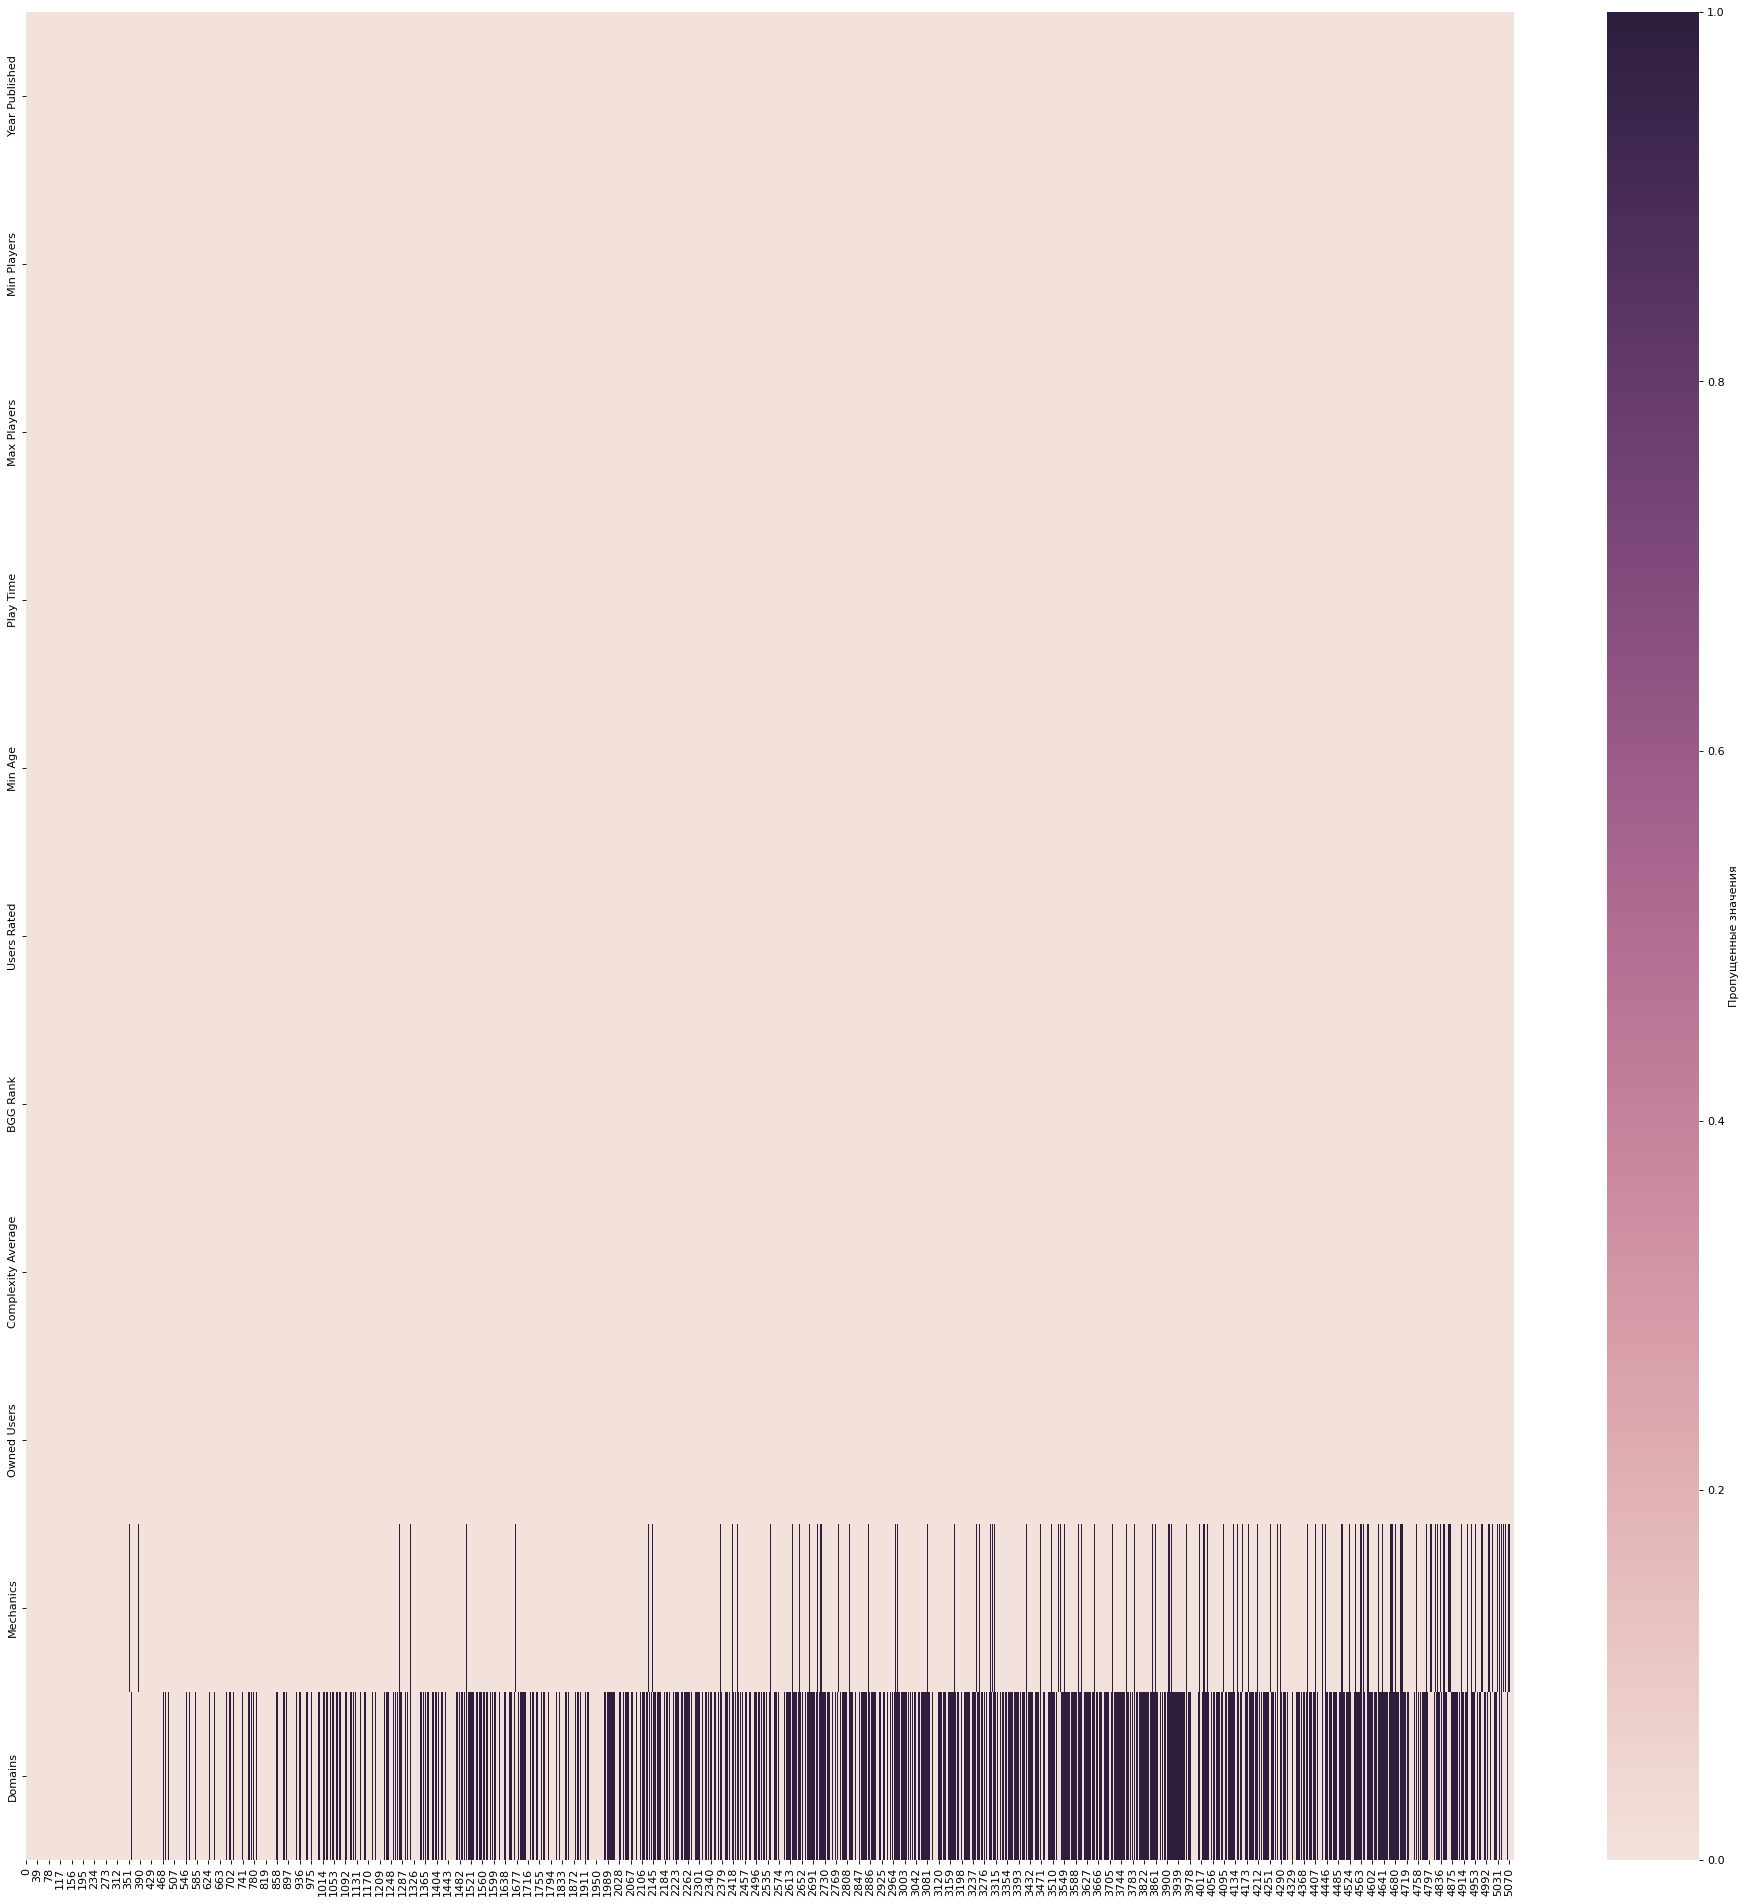

In [ ]:
test.drop(['ID', 'Name'], axis= 1 , inplace = True)
plt.figure(figsize=(30,30), dpi= 80)
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(test.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Пропущенные значения'})

In [ ]:
test.isnull().sum()

Year Published           0
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
BGG Rank                 0
Complexity Average       0
Owned Users              6
Mechanics              398
Domains               2510
dtype: int64

In [ ]:
test["Year Published"] = np.where(test["Year Published"].isna(), 2024, test["Year Published"])
test["Year Published"] = np.where(test["Year Published"], 2024 - test["Year Published"], test["Year Published"])

test["Owned Users"] = np.where(test["Owned Users"].isna(), 0, test["Owned Users"])

test['Complexity Average'] = test['Complexity Average'].apply(lambda x: float(x.replace(',', '.')))

test_mech = test['Mechanics'].str.get_dummies(sep=', ')
test = pd.concat([test.drop(columns=['Mechanics']), test_mech], axis=1)
test_domains = test["Domains"].str.get_dummies(sep=', ')
test = pd.concat([test.drop(columns=['Domains']), test_domains], axis=1)

test.isnull().sum()

Year Published    0
Min Players       0
Max Players       0
Play Time         0
Min Age           0
                 ..
Family Games      0
Party Games       0
Strategy Games    0
Thematic Games    0
Wargames          0
Length: 192, dtype: int64

In [ ]:
u_train = train_x.columns.difference(test.columns)
u_test = test.columns.difference(train_x.columns)

In [ ]:
u_train

Index(['Auction: English', 'Auction: Once Around', 'Closed Economy Auction',
       'Different Dice Movement', 'Hot Potato', 'Multiple-Lot Auction',
       'Turn Order: Random'],
      dtype='object')

In [ ]:
u_test

Index([], dtype='object')

In [ ]:
test.insert(10, "Auction: English", np.nan)
test.insert(11, "Auction: Once Around", np.nan)
test.insert(12,  "Closed Economy Auction", np.nan)
test.insert(13,  "Different Dice Movement", np.nan)
test.insert(14,  "Hot Potato", np.nan)
test.insert(15, "Multiple-Lot Auction", np.nan)
test.insert(16, "Turn Order: Random", np.nan)

In [ ]:
test["Hot Potato"] = np.where(test["Hot Potato"].isna(), 0, test["Hot Potato"])
test["Auction: Once Around"] = np.where(test["Auction: Once Around"].isna(), 0, test["Auction: Once Around"])
test["Closed Economy Auction"] = np.where(test["Closed Economy Auction"].isna(), 0, test["Closed Economy Auction"])
test["Different Dice Movement"] = np.where(test["Different Dice Movement"].isna(), 0, test["Different Dice Movement"])
test["Auction: English"] = np.where(test["Auction: English"].isna(), 0, test["Auction: English"])
test["Multiple-Lot Auction"] = np.where(test["Multiple-Lot Auction"].isna(), 0, test["Multiple-Lot Auction"])
test["Turn Order: Random"] = np.where(test["Turn Order: Random"].isna(), 0, test["Turn Order: Random"])

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
order = train_x.columns.tolist()

test = test[order]

In [ ]:
#линейная без масштабирования
answer = model.predict(test)

#линейная со стандартизацией
std = StandardScaler()
test_std = std.fit_transform(test)

answer_std = model_std.predict(test_std)

#линейная с нормализацией
norm = MinMaxScaler()
test_norm = norm.fit_transform(test)

answer_norm = model_norm.predict(test_norm)

#дерево без масштабирования
answer_tree = model_tree.predict(test)

#дерево со стандартизацией
answer_std_tree = model_std_tree.predict(test_std)

#дерево с норрмализацией
answer_norm_tree = model_norm_tree.predict(test_norm)




In [ ]:
answer = pd.DataFrame(answer, columns=["Rating Average"])
answer.index.name = 'index'

answer_std = pd.DataFrame(answer_std, columns=["Rating Average"])
answer_std.index.name = 'index'

answer_norm = pd.DataFrame(answer_norm, columns=["Rating Average"])
answer_norm.index.name = 'index'

answer_tree = pd.DataFrame(answer_tree, columns=["Rating Average"])
answer_tree.index.name = 'index'

answer_std_tree = pd.DataFrame(answer_std_tree, columns=["Rating Average"])
answer_std_tree.index.name = 'index'

answer_norm_tree = pd.DataFrame(answer_norm_tree, columns=["Rating Average"])
answer_norm_tree.index.name = 'index'



answer.reset_index().to_csv('answer.csv', index=False)

answer_std.reset_index().to_csv('answer_std.csv', index=False)

answer_norm.reset_index().to_csv('answer_norm.csv', index=False)

answer_tree.reset_index().to_csv('answer_tree.csv', index=False)

answer_std_tree.reset_index().to_csv('answer_std_tree.csv', index=False)

answer_norm_tree.reset_index().to_csv('answer_norm_tree.csv', index=False)